# Regression - FFNN

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('abalone.data',
                 names=['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings'])

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
df['Sex'] = df['Sex'].replace(('I','M','F'),(3,1,2))

X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [6]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Build Model

In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [31]:
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=[8]),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1)
])

In [32]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_18 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_19 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_20 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_21 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 513       
Total params: 175,841
Trainable params: 175,841
Non-trainable params: 0
________________________________________________

In [24]:
optimizer = tf.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'mse'])

In [25]:
history = model.fit(X_train, y_train, 
                     epochs=100,
                     batch_size=128,
                     validation_data=(X_test, y_test),
                     verbose = 1
                    )

Train on 3341 samples, validate on 836 samples
Epoch 1/100
3341/3341 [==============================] - 1s 262us/sample - loss: 101.9316 - mae: 9.5695 - mse: 101.9316 - val_loss: 98.3032 - val_mae: 9.3193 - val_mse: 98.3032
Epoch 2/100
3341/3341 [==============================] - 0s 53us/sample - loss: 83.2159 - mae: 8.5138 - mse: 83.2159 - val_loss: 72.2555 - val_mae: 7.7585 - val_mse: 72.2555
Epoch 3/100
3341/3341 [==============================] - 0s 55us/sample - loss: 49.7496 - mae: 6.1344 - mse: 49.7496 - val_loss: 31.5787 - val_mae: 4.4956 - val_mse: 31.5787
Epoch 4/100
3341/3341 [==============================] - 0s 55us/sample - loss: 19.4365 - mae: 3.4652 - mse: 19.4365 - val_loss: 16.6150 - val_mae: 3.2542 - val_mse: 16.6150
Epoch 5/100
3341/3341 [==============================] - 0s 48us/sample - loss: 14.3755 - mae: 2.9827 - mse: 14.3755 - val_loss: 14.1398 - val_mae: 2.9133 - val_mse: 14.1398
Epoch 6/100
3341/3341 [==============================] - 0s 49us/sample - loss: 

3341/3341 [==============================] - 0s 60us/sample - loss: 5.3096 - mae: 1.6605 - mse: 5.3096 - val_loss: 5.9191 - val_mae: 1.6769 - val_mse: 5.9191
Epoch 49/100
3341/3341 [==============================] - 0s 44us/sample - loss: 5.2763 - mae: 1.6479 - mse: 5.2763 - val_loss: 5.8548 - val_mae: 1.6768 - val_mse: 5.8548
Epoch 50/100
3341/3341 [==============================] - 0s 67us/sample - loss: 5.2638 - mae: 1.6530 - mse: 5.2638 - val_loss: 5.8957 - val_mae: 1.6603 - val_mse: 5.8957
Epoch 51/100
3341/3341 [==============================] - 0s 67us/sample - loss: 5.2108 - mae: 1.6389 - mse: 5.2108 - val_loss: 5.8182 - val_mae: 1.6615 - val_mse: 5.8182
Epoch 52/100
3341/3341 [==============================] - 0s 97us/sample - loss: 5.1972 - mae: 1.6324 - mse: 5.1972 - val_loss: 5.8441 - val_mae: 1.6489 - val_mse: 5.8441
Epoch 53/100
3341/3341 [==============================] - 0s 70us/sample - loss: 5.1652 - mae: 1.6270 - mse: 5.1652 - val_loss: 5.6941 - val_mae: 1.6707 - val

Epoch 96/100
3341/3341 [==============================] - 0s 43us/sample - loss: 4.5020 - mae: 1.5006 - mse: 4.5020 - val_loss: 4.7861 - val_mae: 1.5574 - val_mse: 4.7861
Epoch 97/100
3341/3341 [==============================] - 0s 40us/sample - loss: 4.5588 - mae: 1.5322 - mse: 4.5588 - val_loss: 4.9428 - val_mae: 1.5429 - val_mse: 4.9428
Epoch 98/100
3341/3341 [==============================] - 0s 41us/sample - loss: 4.4725 - mae: 1.5053 - mse: 4.4725 - val_loss: 4.8281 - val_mae: 1.5512 - val_mse: 4.8281
Epoch 99/100
3341/3341 [==============================] - 0s 42us/sample - loss: 4.4946 - mae: 1.5025 - mse: 4.4946 - val_loss: 4.7882 - val_mae: 1.5491 - val_mse: 4.7882
Epoch 100/100
3341/3341 [==============================] - 0s 42us/sample - loss: 4.4580 - mae: 1.5031 - mse: 4.4580 - val_loss: 4.9428 - val_mae: 1.5421 - val_mse: 4.9428


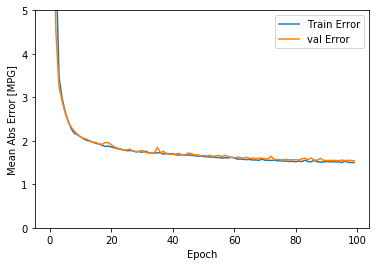

In [26]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error [MPG]')
plt.plot(hist['epoch'], hist['mae'], label='Train Error')
plt.plot(hist['epoch'], hist['val_mae'], label='val Error')
plt.ylim(0, 5)
plt.legend()

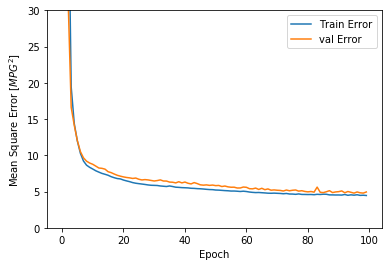

In [27]:
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error [$MPG^2$]')
plt.plot(hist['epoch'], hist['mse'], label='Train Error')
plt.plot(hist['epoch'], hist['val_mse'], label='val Error')
plt.ylim(0, 30)
plt.legend()

In [15]:
loss, mae, mse = model.evaluate(X_test, y_test)
mse

836/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

4.839423

## Model 2 Dummy Columns

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
dummy = pd.get_dummies(df['Sex'])
dummy.head()

df = pd.concat([df.iloc[:,0], dummy, df.iloc[:,1:]], axis=1)

X = df.iloc[:,1:-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [15]:
df.head()

,Sex,1,2,3,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1,1,0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,1,0,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,0,1,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,1,0,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,3,0,0,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
